In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Заданные параметры
l = 1       # Длина стержня
T = 0.1     # Время расчета
a = 1       # Коэффициент теплопроводности
M = 20      # Число узлов по пространству
N = 6       # Число шагов по времени (6 шагов)
h = l / M   # Шаг по пространству
tau = T / N # Шаг по времени
r = a**2 * tau / h**2  # Число Куранта

# Функции
j = lambda x, t: x * (x - x**2)  # Источник j(x,t) = x*(x - x²)
psi = lambda x: x - x**2         # Начальное условие y(x) = x - x²
g0 = lambda t: 0               # Граничное условие слева u(0,t)=0
g1 = lambda t: 0               # Граничное условие справа u(l,t)=0

# Создаем равномерную сетку по пространству и времени
x = np.linspace(0, l, M + 1)
t = np.linspace(0, T, N + 1)


In [3]:
# ----------------------- Явная схема -----------------------
U_explicit = np.zeros((N + 1, M + 1))
U_explicit[0, :] = [psi(xi) for xi in x]  # Начальное условие

for n in range(N):
    for m in range(1, M):
        U_explicit[n + 1, m] = (U_explicit[n, m] +
                                r * (U_explicit[n, m + 1] - 2 * U_explicit[n, m] + U_explicit[n, m - 1]) +
                                tau * j(x[m], t[n + 1]))
    # Граничные условия
    U_explicit[n + 1, 0] = g0(t[n + 1])
    U_explicit[n + 1, M] = g1(t[n + 1])

# ------------------- Чисто неявная схема -------------------
# Для внутренней части используем схему с трёхдиагональной матрицей
A = -r * np.ones(M - 2)
B = (1 + 2 * r) * np.ones(M - 1)
C = -r * np.ones(M - 2)
U_implicit = np.zeros((N + 1, M + 1))
U_implicit[0, :] = [psi(xi) for xi in x]

for n in range(N):
    # Правая часть системы
    d = U_implicit[n, 1:M] + tau * j(x[1:M], t[n + 1])
    # Учет граничных условий
    d[0] += r * g0(t[n + 1])
    d[-1] += r * g1(t[n + 1])
    # Составляем матрицу системы
    A_matrix = np.diag(A, -1) + np.diag(B) + np.diag(C, 1)
    U_implicit[n + 1, 1:M] = np.linalg.solve(A_matrix, d)
    U_implicit[n + 1, 0] = g0(t[n + 1])
    U_implicit[n + 1, M] = g1(t[n + 1])

# --------------- Схема Кранка-Николсона ---------------
# Для схемы Кранка–Николсона коэффициенты немного меняются
A_CN = -r/2 * np.ones(M - 2)
B_CN = (1 + r) * np.ones(M - 1)
C_CN = -r/2 * np.ones(M - 2)
U_CN = np.zeros((N + 1, M + 1))
U_CN[0, :] = [psi(xi) for xi in x]

for n in range(N):
    d_CN = (U_CN[n, 1:M] +
            (r/2) * (U_CN[n, 2:M + 1] - 2 * U_CN[n, 1:M] + U_CN[n, 0:M - 1]) +
            tau * j(x[1:M], t[n + 1]))
    d_CN[0] += (r/2) * g0(t[n + 1])
    d_CN[-1] += (r/2) * g1(t[n + 1])
    A_matrix_CN = np.diag(A_CN, -1) + np.diag(B_CN) + np.diag(C_CN, 1)
    U_CN[n + 1, 1:M] = np.linalg.solve(A_matrix_CN, d_CN)
    U_CN[n + 1, 0] = g0(t[n + 1])
    U_CN[n + 1, M] = g1(t[n + 1])


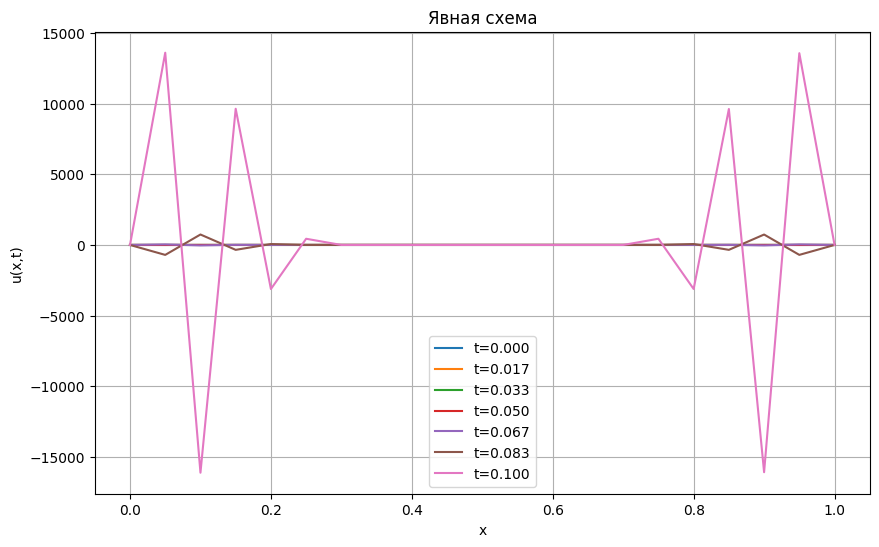

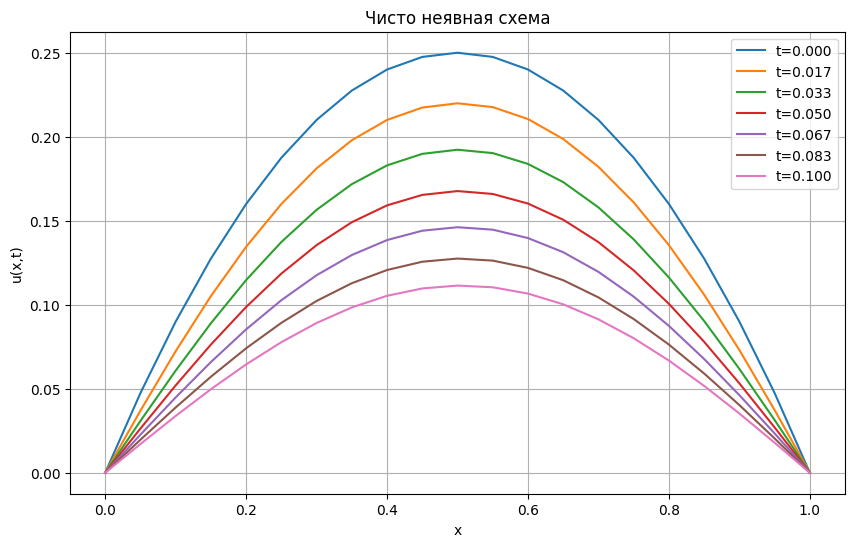

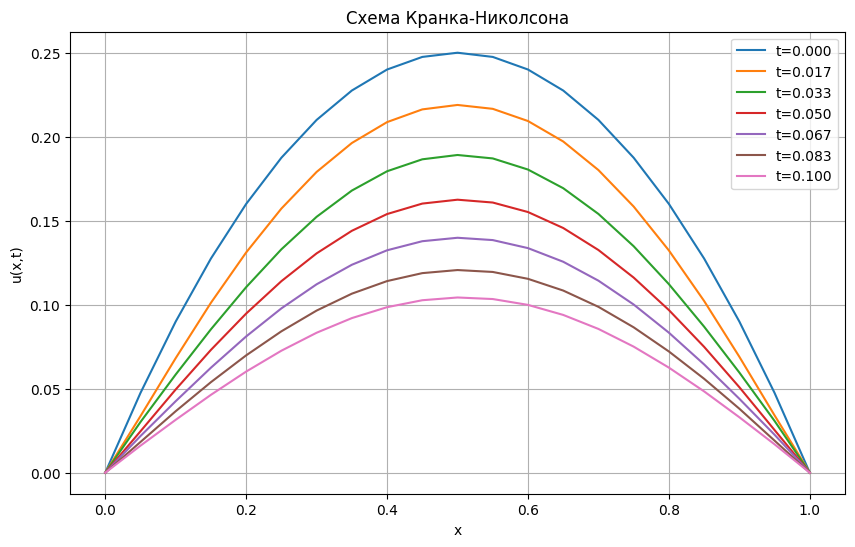

In [4]:

# ------------------------- Графики -------------------------
# Явная схема
plt.figure(figsize=(10, 6))
for i in range(0, N + 1):
    plt.plot(x, U_explicit[i, :], label=f't={t[i]:.3f}')
plt.title("Явная схема")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid()
plt.show()

# Чисто неявная схема
plt.figure(figsize=(10, 6))
for i in range(0, N + 1):
    plt.plot(x, U_implicit[i, :], label=f't={t[i]:.3f}')
plt.title("Чисто неявная схема")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid()
plt.show()

# Схема Кранка-Николсона
plt.figure(figsize=(10, 6))
for i in range(0, N + 1):
    plt.plot(x, U_CN[i, :], label=f't={t[i]:.3f}')
plt.title("Схема Кранка-Николсона")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid()
plt.show()
